In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy.stats.stats import pearsonr
data = pd.read_csv("C:/Users/msteinme/Documents/CrudeUreaCorrelation.csv")
data.head()

,Date,Crude,Urea
0,1/5/1996,19.65,220
1,1/12/1996,17.98,220
2,1/19/1996,18.25,218
3,1/26/1996,17.36,215
4,2/2/1996,17.38,205


In [274]:
data['Date'] = pd.to_datetime(data['Date'])
date = data['Date']
data.dtypes

Date     datetime64[ns]
Crude           float64
Urea              int64
dtype: object

In [275]:
data.index = data['Date'].values
data = data.drop(['Date'],axis=1)
data.head(2)

,Crude,Urea
1996-01-05,19.65,220
1996-01-12,17.98,220


In [281]:
data.describe()

,Crude,Urea
count,1068.000000,1068.000000
mean,54.749494,259.632959
std,31.159480,135.341583
min,11.260000,83.000000
25%,26.500000,152.000000
50%,49.125000,240.000000
75%,81.922500,335.000000
max,145.860000,825.000000


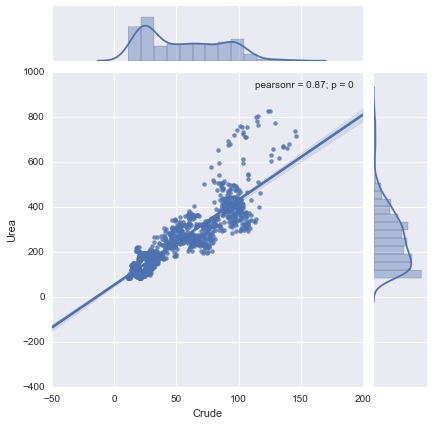

In [14]:
sns.jointplot(x='Crude',y='Urea', data=data,kind='reg')

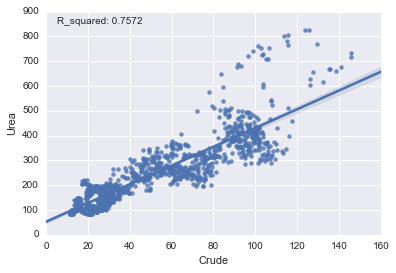

In [11]:
sns.regplot(x='Crude',y='Urea',data=data)
plt.text(5,850,'R_squared: 0.7572')

In [297]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fit a OLS model with all, see how R^2 changes
X = data[['Crude']]
Y = data[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
r_square = est.rsquared
print(r_square)

0.757239751857


0.757239751857


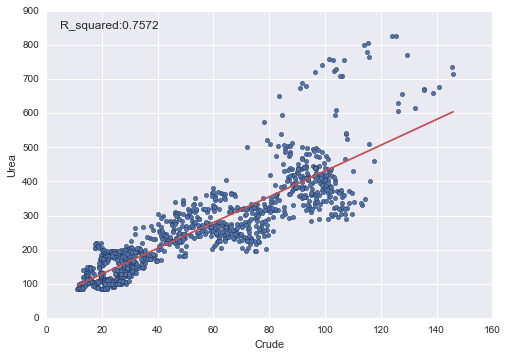

In [309]:
# We pick 100 hundred points equally spaced from the min to the max
X = data[['Crude']]
Y = data[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
r_square = est.rsquared
print(r_square)

X_prime = np.linspace(data.Crude.min(), data.Crude.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)
y_hat = est.predict(X_prime)
plt.scatter(data.Crude,data.Urea)
plt.xlabel('Crude')
plt.ylabel('Urea')
plt.plot(X_prime[:, 1], y_hat, 'r')
plt.text(5,850,'R_squared:0.7572')

In [310]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
%pylab inline
import matplotlib.pyplot as plt
npMatrix = np.matrix(data)
X, Y = npMatrix[:,0], npMatrix[:,1]
mdl = LinearRegression().fit(X,Y) # either this or the next line
#mdl = LinearRegression().fit(filtered_data[['x']],filtered_data.y)
m = mdl.coef_[0]
b = mdl.intercept_
print ("formula: y = {0}x + {1}".format(m, b)) # following slope intercept form 


Populating the interactive namespace from numpy and matplotlib
formula: y = [ 3.77970365]x + [ 52.69609499]


`%matplotlib` prevents importing * from pylab and numpy


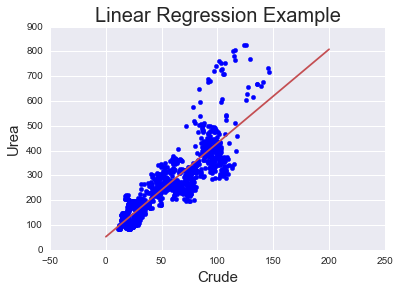

In [314]:
plt.scatter(X,Y, color='blue')
plt.plot([0,200],[b,m*200+b],'r')
plt.title('Linear Regression Example', fontsize = 20)
plt.xlabel('Crude', fontsize = 15)
plt.ylabel('Urea', fontsize = 15)

In [217]:
import pandas.io.data as web
crude = data['Crude']
urea = data['Urea']
data['roll_corr'] = pd.rolling_corr(crude,urea,window = 52)
data

,Crude,Urea,roll_corr
1996-01-05,19.65,220,NaN
1996-01-12,17.98,220,NaN
1996-01-19,18.25,218,NaN
1996-01-26,17.36,215,NaN
1996-02-02,17.38,205,NaN
1996-02-09,17.38,205,NaN
1996-02-16,18.40,210,NaN
1996-02-23,18.45,210,NaN
1996-03-01,18.62,210,NaN
1996-03-08,18.87,205,NaN


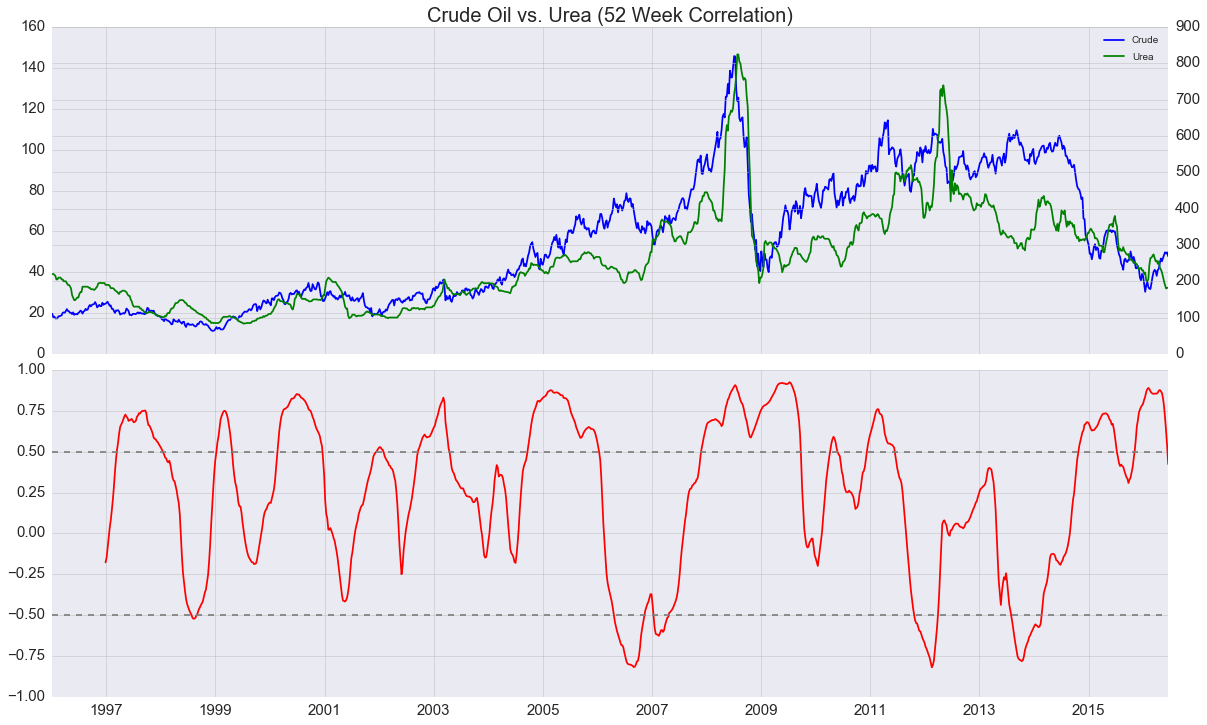

In [218]:
from matplotlib.pyplot import *
from matplotlib import gridspec

crude = data['Crude']
urea = data['Urea']
roll_corr = data['roll_corr']
fig = plt.figure(figsize=(20,12))

plt.subplots_adjust(hspace=0.05)

#1st subplot has the prices of oil and urea
ax1 = fig.add_subplot(211)
ax1t = ax1.twinx()
ax1.plot(crude,'b', label = 'Crude')
ax1t.plot(urea,'g',label='Urea')
ax1.set_title('Crude Oil vs. Urea (52 Week Correlation)',size=20)
ax1.tick_params(axis='y', which='major', labelsize=15)
ax1t.tick_params(axis='y', which='major', labelsize=15)
ax1.xaxis.set_ticklabels([])

#2nd subplot will show 52 week correlation
ax2 = fig.add_subplot(212)
ax2.plot (roll_corr,'r')
ax2.axhline(0.5, color='gray',linestyle = '--')
ax2.axhline(-0.5, color='gray',linestyle = '--')
ax2.yaxis.set_ticks([-1.0,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1.0])
ax2.tick_params(axis='y', which='major', labelsize=15)
ax2.tick_params(axis='x', which='major', labelsize=15)
ax2.set_xlim(['1996-01-05','2016-06-17'])

#legend
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels,bbox_to_anchor=(1,1))
handles, labels = ax1t.get_legend_handles_labels()
ax1t.legend(handles,labels,bbox_to_anchor=(0.995,0.95))

plt.show()

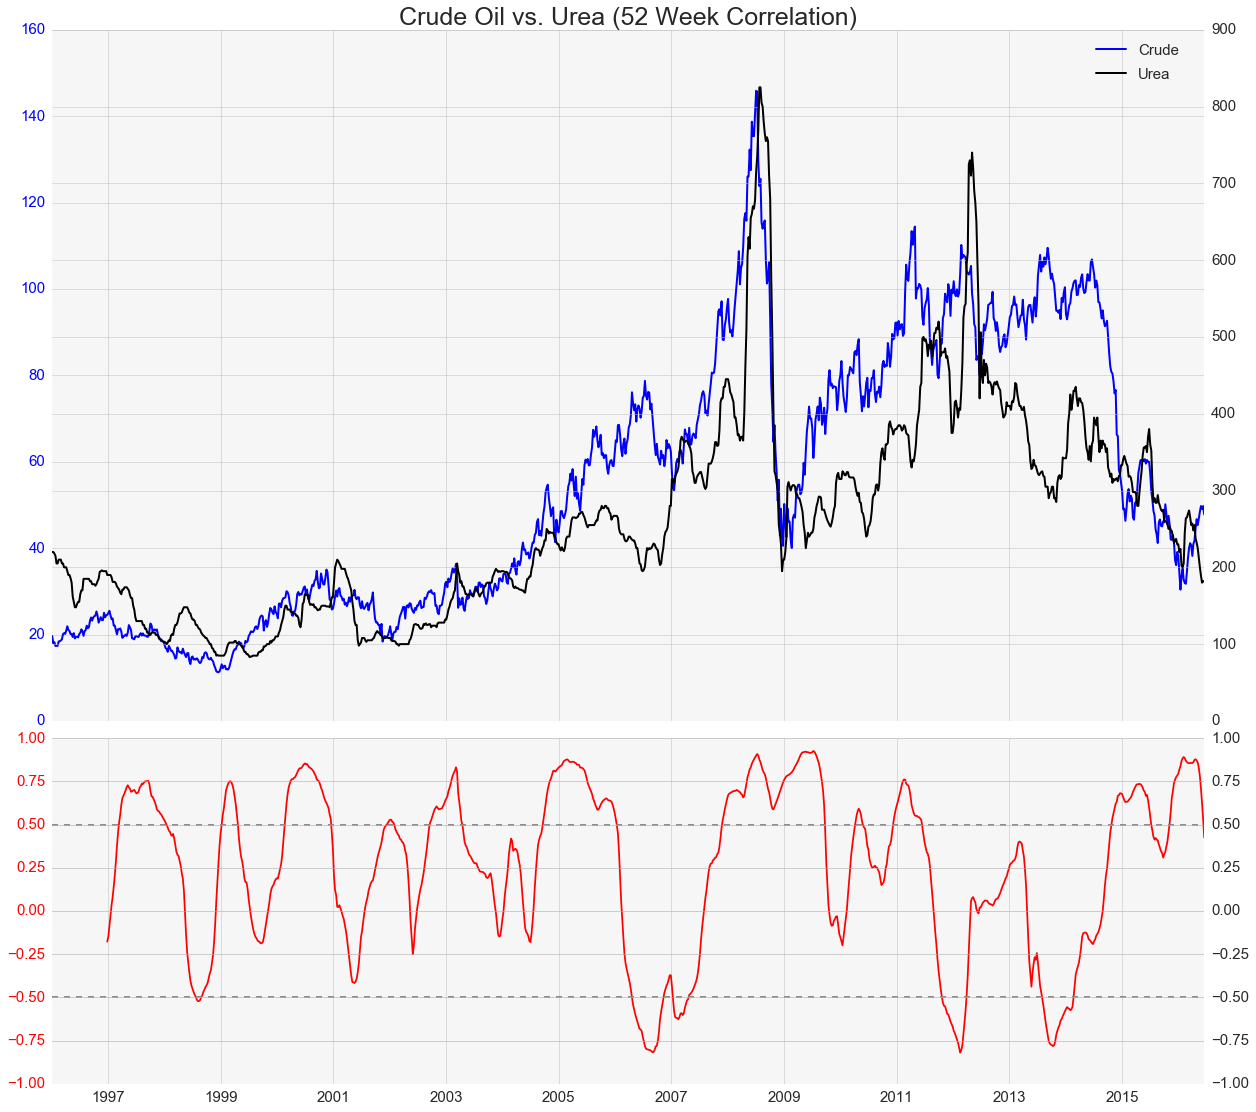

In [225]:
import matplotlib.lines as mlines

crude = data['Crude']
urea = data['Urea']
roll_corr = data['roll_corr']

textsize = 9
#left, width = 0.1, 0.8
rect1 = [left, 0.9, width, 0.8]
rect2 = [left, 0.48, width, 0.4]

fig = plt.figure(facecolor='white',figsize=(20,12))
axescolor = '#f6f6f6'  # the axes background color

#making subplot size
ax1 = fig.add_axes(rect1, axisbg=axescolor,sharex=ax2)  # left, bottom, width, height
ax1t = ax1.twinx()
ax2 = fig.add_axes(rect2, axisbg=axescolor)
ax2t = ax2.twinx()

#top subplot
ax1.set_title('Crude Oil vs. Urea (52 Week Correlation)',size=25)
ax1.tick_params(axis='y', which='major', labelsize=15,colors='blue')
ax1t.tick_params(axis='y', which='major', labelsize=15)
ax1.xaxis.set_ticklabels([])
ax1.plot(crude,color='b',lw=2, label = 'Crude')
ax1t.plot(urea,color='k',lw=2,label='Urea')

#bottom subplot
ax2.plot (roll_corr,'r')
ax2.axhline(0.5, color='gray',linestyle = '--')
ax2.axhline(-0.5, color='gray',linestyle = '--')
ax2.yaxis.set_ticks([-1.0,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1.0])
ax2.tick_params(axis='y', which='major', labelsize=15,colors='r')
ax2.tick_params(axis='x', which='major', labelsize=15)
ax2.set_xlim(['1996-01-05','2016-06-17'])
ax2t.yaxis.set_ticks([-1.0,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1.0])
ax2t.tick_params(axis='y', which='major', labelsize=15)


#legend
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels,bbox_to_anchor=(0.99,1),prop={'size':15})
handles, labels = ax1t.get_legend_handles_labels()
ax1t.legend(handles,labels,bbox_to_anchor=(0.982,0.965),prop={'size':15})

plt.show()


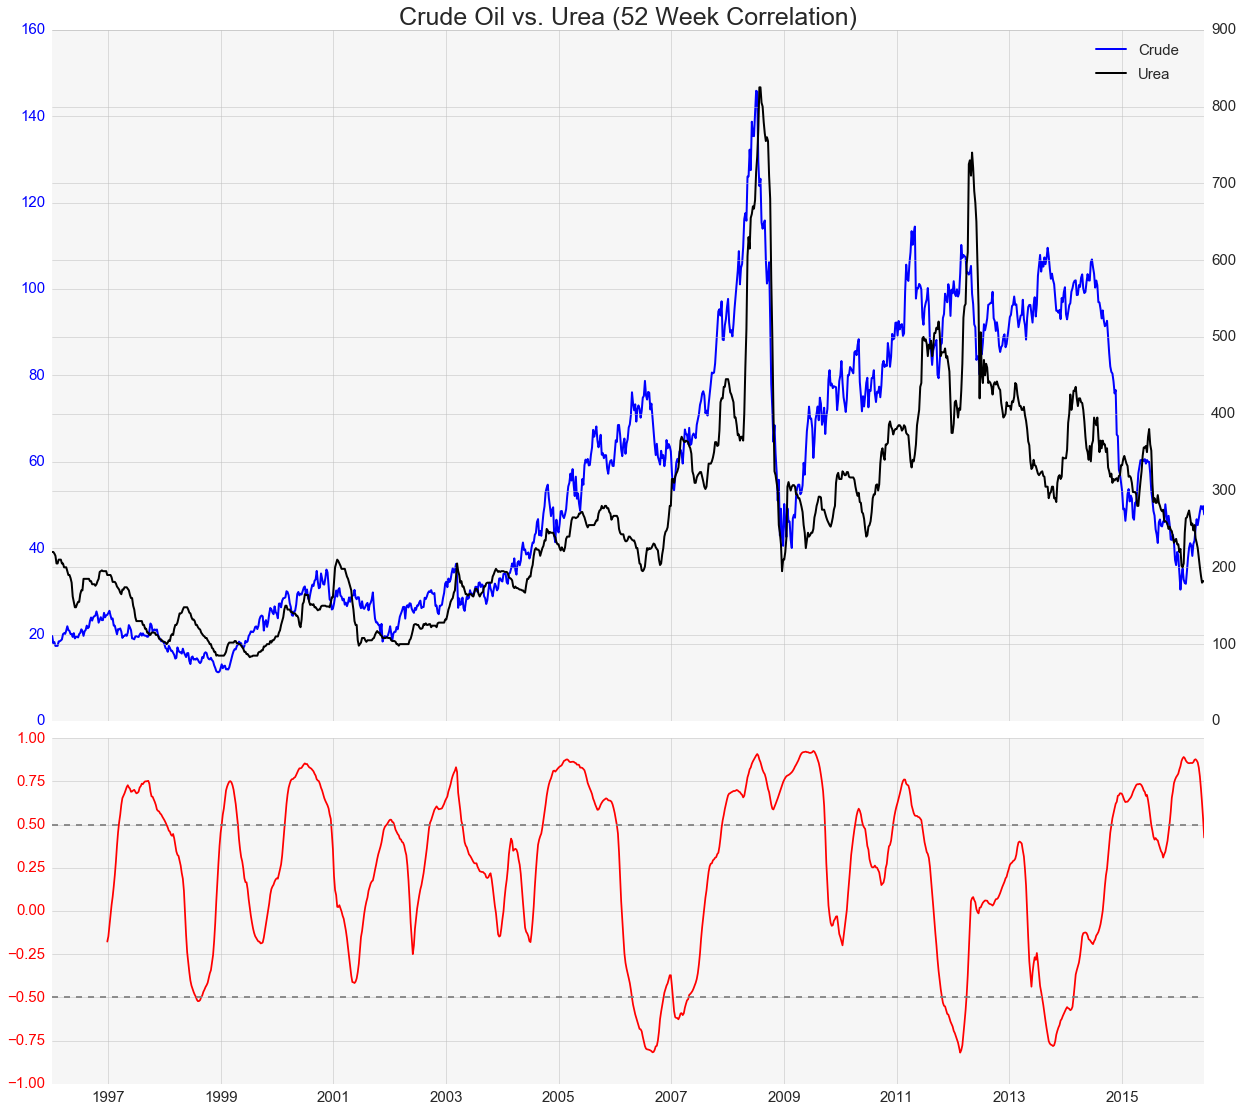

In [222]:
crude = data['Crude']
urea = data['Urea']
roll_corr = data['roll_corr']

textsize = 9
#left, width = 0.1, 0.8
rect1 = [left, 0.9, width, 0.8]
rect2 = [left, 0.48, width, 0.4]

fig = plt.figure(facecolor='white',figsize=(20,12))
axescolor = '#f6f6f6'  # the axes background color

#making subplot size
ax1 = fig.add_axes(rect1, axisbg=axescolor,sharex=ax2)  # left, bottom, width, height
ax1t = ax1.twinx()
ax2 = fig.add_axes(rect2, axisbg=axescolor)

#top subplot
ax1.set_title('Crude Oil vs. Urea (52 Week Correlation)',size=25)
ax1.tick_params(axis='y', which='major', labelsize=15,colors='blue')
ax1t.tick_params(axis='y', which='major', labelsize=15)
ax1.xaxis.set_ticklabels([])
ax1.plot(crude,color='b',lw=2, label = 'Crude')
ax1t.plot(urea,color='k',lw=2,label='Urea')

#bottom subplot
ax2.plot (roll_corr,'r')
ax2.axhline(0.5, color='gray',linestyle = '--')
ax2.axhline(-0.5, color='gray',linestyle = '--')
ax2.yaxis.set_ticks([-1.0,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1.0])
ax2.tick_params(axis='y', which='major', labelsize=15,colors='r')
ax2.tick_params(axis='x', which='major', labelsize=15)
ax2.set_xticks(['1996-01-10','2016-06-10'], minor=True) 
#ax2.xaxis.set_ticklabels(['1996-01-10','2016-06-10'],minor=True)
ax2.set_xlim(['1996-01-05','2016-06-17'])


#legend
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels,bbox_to_anchor=(0.99,1),prop={'size':15})
handles, labels = ax1t.get_legend_handles_labels()
ax1t.legend(handles,labels,bbox_to_anchor=(0.982,0.965),prop={'size':15})

plt.show()